In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils

from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
## Import data
# Added header row manually to CSV.
driving_csv = pd.read_csv("data-udacity/driving_log.csv")

# Examine data
print("Number of datapoints: %d" % len(driving_csv))

driving_csv.head()



Number of datapoints: 8036


,center,left,right,steering,throttle,brake,speed
0,IMG/center_2016_12_01_13_30_48_287.jpg,IMG/left_2016_12_01_13_30_48_287.jpg,IMG/right_2016_12_01_13_30_48_287.jpg,0.0,0.0,0.0,22.148290
1,IMG/center_2016_12_01_13_30_48_404.jpg,IMG/left_2016_12_01_13_30_48_404.jpg,IMG/right_2016_12_01_13_30_48_404.jpg,0.0,0.0,0.0,21.879630
2,IMG/center_2016_12_01_13_31_12_937.jpg,IMG/left_2016_12_01_13_31_12_937.jpg,IMG/right_2016_12_01_13_31_12_937.jpg,0.0,0.0,0.0,1.453011
3,IMG/center_2016_12_01_13_31_13_037.jpg,IMG/left_2016_12_01_13_31_13_037.jpg,IMG/right_2016_12_01_13_31_13_037.jpg,0.0,0.0,0.0,1.438419
4,IMG/center_2016_12_01_13_31_13_177.jpg,IMG/left_2016_12_01_13_31_13_177.jpg,IMG/right_2016_12_01_13_31_13_177.jpg,0.0,0.0,0.0,1.418236


Images: 8036
Sample image
Image shape:  (160, 320, 3)


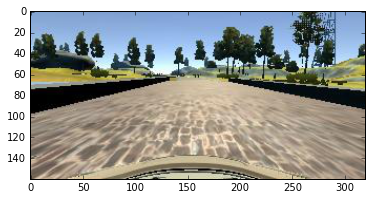

In [3]:
# Extract centre image and steering angle from table
# Format: X_path: centre image name, y: steering angle
X_path = [driving_csv.loc[i]["center"] \
              for i in range(len(driving_csv))]
y = [driving_csv.loc[i]["steering"] \
              for i in range(len(driving_csv))]

# Import images
X_images = [mpimg.imread("data-udacity/" + image_path) for image_path in X_path]

# View image
print("Images: %d" % len(X_images))
print("Sample image")
plt.imshow(X_images[0])
# X_images[0]

print("Image shape: ", X_images[0].shape)

In [4]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_images, y, test_size=0.1, random_state=42)

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [7]:
print("X_train.shape: ", X_train.shape)
print("X_test.shape: ", X_test.shape)
print("y_train.shape: ", y_train.shape)
print("y_test.shape: ", y_test.shape)

X_train.shape:  (7232, 160, 320, 3)
X_test.shape:  (804, 160, 320, 3)
y_train.shape:  (7232,)
y_test.shape:  (804,)


In [8]:
X_mini = X_train[:10]
y_mini = y_train[:10]

In [9]:
X_train_less = X_train[:2000]

In [10]:
y_train_less = y_train[:2000]

In [21]:
help(flow_from_directory)

NameError: name 'flow_from_directory' is not defined

In [24]:
# Normalise data
train_datagen = ImageDataGenerator(
                            samplewise_std_normalization=True, 
                            samplewise_center=True
)

train_generator = train_datagen.flow_from_directory(
    'data-udacity/IMG',
    target_size=(160,320,3),
    class_mode=None,
    seed=42    
)

Found 0 images belonging to 0 classes.


Reference: https://keras.io/preprocessing/image/

In [ ]:
# NVIDIA End to End Learning Pipeline Model

model = Sequential()

# Resize the data (Div number of pixels by two each length)
# TODO: Add resizing layer

# Conv layer 1, 5x5 kernel to 24@ (from 3@)
# TODO: What does the number of filters MEAN?
# Stride of 2x2
model.add(Convolution2D(24, 5, 5,
                        input_shape=(160,320,3)))
model.add(Activation('relu'))
model.add(Dropout(0.1))

# Conv layer 2, 5x5 kernel to 36@
model.add(Convolution2D(36, 5, 5))
model.add(Activation('relu'))
model.add(Dropout(0.1))

# Conv layer 3, 5x5 kernel to 48@
model.add(Convolution2D(48, 5, 5))
model.add(Activation('relu'))
model.add(Dropout(0.1))

# Conv layer 4, 3x3 kernel to 64@
model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(Dropout(0.1))

# Conv layer 5, 3x3 kernel to 64@
model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(Dropout(0.1))

# Flatten
model.add(Flatten())

# Fully connected layer 1, 1164 neurons
model.add(Dense(1164))
model.add(Activation('relu'))
model.add(Dropout(0.1))

# Fc2, 100 neurons
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.1))

# Fc3, 50 neurons
model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dropout(0.1))

# Fc4, 10 neurons
model.add(Dense(10))
model.add(Activation('relu'))
model.add(Dropout(0.1))

# Output
model.add(Dense(1))

# Compile model
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error',
              optimizer=sgd,
              metrics=['accuracy'])

Reference: [NVIDIA's 'End to End Learning for Self-Driving Cars' (April 2016)](http://images.nvidia.com/content/tegra/automotive/images/2016/solutions/pdf/end-to-end-dl-using-px.pdf)

In [ ]:
model.fit_generator(
    train_generator,
    samples_per_epoch=8000,
    nb_epoch=5
)

In [6]:
help(model.fit)

Help on method fit in module keras.models:

fit(x, y, batch_size=32, nb_epoch=10, verbose=1, callbacks=[], validation_split=0.0, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, **kwargs) method of keras.models.Sequential instance
    Trains the model for a fixed number of epochs.
    
    # Arguments
        x: input data, as a Numpy array or list of Numpy arrays
            (if the model has multiple inputs).
        y: labels, as a Numpy array.
        batch_size: integer. Number of samples per gradient update.
        nb_epoch: integer, the number of epochs to train the model.
        verbose: 0 for no logging to stdout,
            1 for progress bar logging, 2 for one log line per epoch.
        callbacks: list of `keras.callbacks.Callback` instances.
            List of callbacks to apply during training.
            See [callbacks](/callbacks).
        validation_split: float (0. < x < 1).
            Fraction of the data to use as held-out validation 

In [ ]:
# Train model
batch_size = 5
nb_epoch = 5
# data_augmentation = True

model.fit(X_mini, y_mini,
              batch_size=batch_size,
              nb_epoch=nb_epoch,
              validation_split=0.1,
              # validation_data=(X_test, y_test),
              show_accuracy=True,
              shuffle=True)

/Users/jessica/anaconda/lib/python3.5/site-packages/keras/models.py:635: UserWarning: The "show_accuracy" argument is deprecated, instead you should pass the "accuracy" metric to the model at compile time:
`model.compile(optimizer, loss, metrics=["accuracy"])`
  warnings.warn('The "show_accuracy" argument is deprecated, '


Train on 9 samples, validate on 1 samples
Epoch 1/5


In [17]:
from keras.models import model_from_json

model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
    
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


Reference: http://machinelearningmastery.com/save-load-keras-deep-learning-models/

In [16]:
model.get_config()

[{'class_name': 'Convolution2D',
  'config': {'W_constraint': None,
   'W_regularizer': None,
   'activation': 'linear',
   'activity_regularizer': None,
   'b_constraint': None,
   'b_regularizer': None,
   'batch_input_shape': (None, 160, 320, 3),
   'bias': True,
   'border_mode': 'same',
   'dim_ordering': 'tf',
   'init': 'glorot_uniform',
   'input_dtype': 'float32',
   'name': 'convolution2d_1',
   'nb_col': 3,
   'nb_filter': 160,
   'nb_row': 3,
   'subsample': (1, 1),
   'trainable': True}},
 {'class_name': 'Activation',
  'config': {'activation': 'relu', 'name': 'activation_1', 'trainable': True}},
 {'class_name': 'Convolution2D',
  'config': {'W_constraint': None,
   'W_regularizer': None,
   'activation': 'linear',
   'activity_regularizer': None,
   'b_constraint': None,
   'b_regularizer': None,
   'bias': True,
   'border_mode': 'valid',
   'dim_ordering': 'tf',
   'init': 'glorot_uniform',
   'name': 'convolution2d_2',
   'nb_col': 3,
   'nb_filter': 32,
   'nb_row': 3

In [22]:
# Save model weights to file
model.save_weights("model.h5")

In [21]:
model.get_weights()

[array([[[[ -1.61183631e+00,              nan,  -6.54338026e+00, ...,
                        nan,  -8.35949312e+08,  -5.79365056e+08],
          [ -1.63578928e+00,              nan,  -6.89629412e+00, ...,
                        nan,  -8.82698368e+08,  -6.01344576e+08],
          [ -1.51502705e+00,              nan,  -6.49971247e+00, ...,
                        nan,  -8.94890112e+08,  -5.65553984e+08]],
 
         [[ -1.60306954e+00,              nan,  -6.66344833e+00, ...,
                        nan,  -8.34900480e+08,  -5.81834304e+08],
          [ -1.63262761e+00,              nan,  -6.97330952e+00, ...,
                        nan,  -8.81816832e+08,  -6.03798208e+08],
          [ -1.51120973e+00,              nan,  -6.58293962e+00, ...,
                        nan,  -8.95626560e+08,  -5.67868480e+08]],
 
         [[ -1.58325267e+00,              nan,  -6.66285944e+00, ...,
                        nan,  -8.22740288e+08,  -5.77862400e+08],
          [ -1.62221205e+00,              

In [19]:
with open("model.h5", "a") as f:
    f.write(str(model.get_weights())    

SyntaxError: unexpected EOF while parsing (<ipython-input-19-9b2cb72e27c5>, line 2)